#### Hypothesis 1: Tweets spreading misinformation/disinformation regarding the story about Noynoy Aquino and Trillanes selling Scarborough Shoal are likely to have more quote retweets and replies than likes and retweets.

Based on the hypothesis and the structure of the dataset after the exploration phase, the appropriate statistical test for **hypothesis 1** is a **paired t-test**. This is because it is specifically comparing the means of **quote retweets and replies** against **likes and retweets** within the **same group of tweets**.

Here's a more in-depth explanation of why a paired t-test is suitable:

- **Paired Observations**: In the hypothesis, you are comparing the number of **quote retweets and replies** with the number of **likes and retweets**. Each tweet in the dataset serves as its own control, as you are comparing the engagement metrics within the same tweet. This implies paired observations, where each tweet has values for both quote retweets/replies and likes/retweets.

- **Dependent Variables**: You are comparing the means of **quote retweets and replies** against the means of **likes and retweets**. Both quote retweets/replies and likes/retweets are continuous variables that represent engagement metrics. Therefore, a test that can compare the means of continuous dependent variables is appropriate.

- **Research Question**: The hypothesis specifically states that **quote retweets and replies are expected to be higher than likes and retweets** in tweets spreading misinformation. The focus is on the difference in means between these two sets of variables within the same group. A paired test is designed to analyze the difference between paired observations and is well-suited to address this research question.

By employing a paired t-test, you can effectively analyze whether there is a significant difference in the means of quote retweets and replies compared to likes and retweets, thereby addressing **hypothesis 1** in your analysis.


**Step 0: Dataset Preparation**

It is important to note that prior to this step, we have already completed the data exploration phase, where we thoroughly cleaned and pre-processed our dataset. As a result, there is no immediate need to make further alterations to the dataset, unless absolutely necessary. The dataset is already in a suitable format for the subsequent analysis. But we will still need to import the required libraries and import the dataset to and store it to a pandas dataframe.

In [53]:
import pandas as pd
from scipy.stats import bartlett, shapiro, wilcoxon
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare data
df = pd.read_csv('../../Data Exploration/cleaned_dataset.csv')

**Step 1: Calculate the difference**

Compute the differences between the values of quote retweets and replies, and the values of likes and retweets for each tweet. Create a new variable called "Difference" or subtract the values directly.

In [54]:
df['Difference'] = (df['Quote Tweets'] + df['Replies']) - (df['Likes'] + df['Retweets'])

**Step 2: paired t-test assumptions check**

Check the assumptions of the paired t-test, such as the normality of the differences, the independence of observations, and the constant variance of the differences, and verify if they hold for the data.

1. Normality of Differences:
    * Visualize the difference
        - Histogram

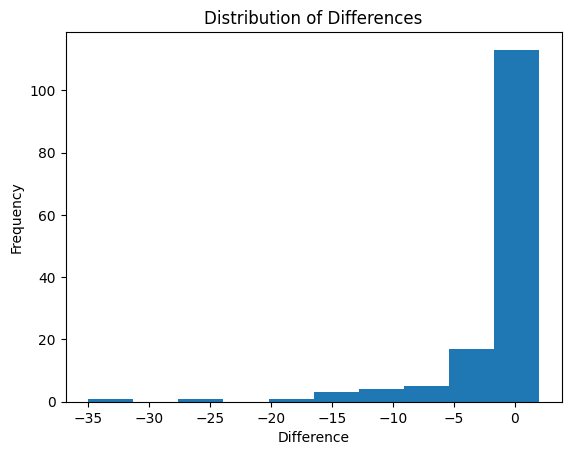

In [55]:
plt.hist(df['Difference'], bins=10)  # Adjust the number of bins as needed
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.title('Distribution of Differences')
plt.show()

* 
    * 
        - Alternatively, we can visualize using density plot

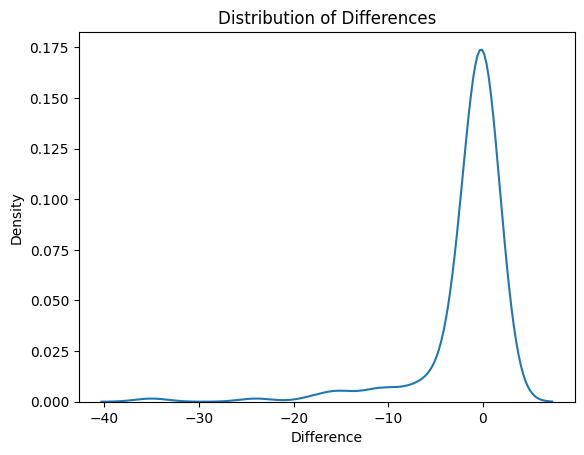

In [56]:
sns.kdeplot(df['Difference'])
plt.xlabel('Difference')
plt.ylabel('Density')
plt.title('Distribution of Differences')
plt.show()

* 
    * Perform a normality test: use the Shapiro-Wilk test to formally assess the normality of the differences. The Shapiro-Wilk test checks the null hypothesis that the data follows a normal distribution. If the p-value is greater than a chosen significance level (e.g., 0.05), you fail to reject the null hypothesis, indicating that the data is approximately normally distributed.

In [57]:
statistic, p_value = shapiro(df['Difference'])
print('Shapiro-Wilk test statistic:', statistic)
print('p-value:', p_value)

Shapiro-Wilk test statistic: 0.5111603736877441
p-value: 5.475703656788616e-20


In this case, the p-value is approximately 5.48e-20, which is an extremely small value. Typically, a significance level of 0.05 (or 5%) is used as a threshold for statistical significance. Since the p-value is much smaller than 0.05, it provides strong evidence to reject the null hypothesis that the data is normally distributed.

Therefore, based on this analysis, we can conclude that the differences between quote retweets/replies and likes/retweets are not normally distributed in your data which is further solidified by the plots since it shows that the data is a bell curve that is skewed to the right.

**<u>Hence the normality assumption for paired t-test is violated</u>**.

2. Independence of observation
    * Check for any dependencies or clustering within the data. For example, you can count the number of unique accounts to see if there are multiple tweets from the same account:

In [58]:
num_unique_accounts = len(df['Account handle'].unique())
print("Number of unique accounts:", num_unique_accounts)

Number of unique accounts: 122


3. Constant variance of the differences:
    * Plot a scatterplot of the differences against the corresponding observation order.

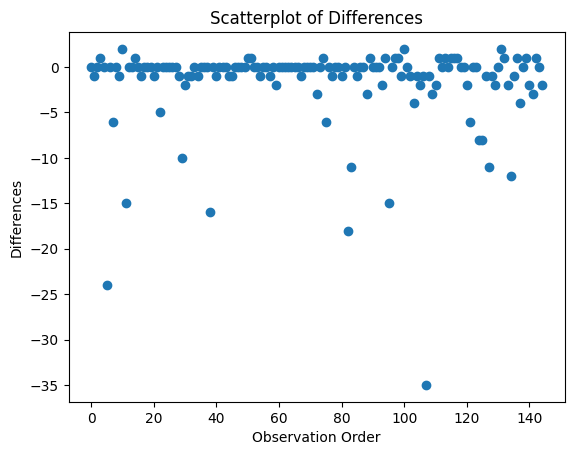

In [59]:
plt.scatter(range(len(df['Difference'])), df['Difference'])
plt.xlabel('Observation Order')
plt.ylabel('Differences')
plt.title('Scatterplot of Differences')
plt.show()

* 
    * Plot a residual plot to assess the constant variance. This involves plotting the residuals (differences - mean or fitted values) against the corresponding observation order:

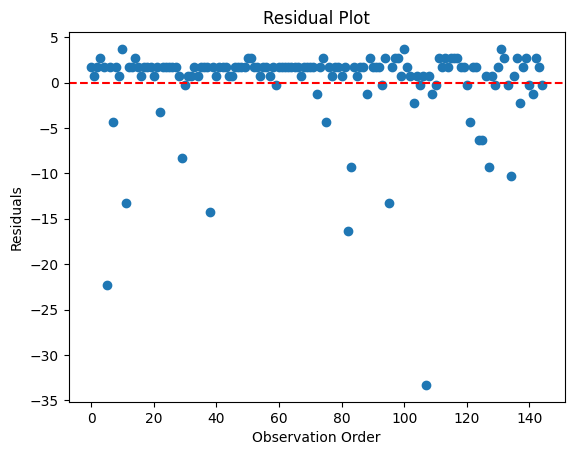

In [60]:
mean_difference = df['Difference'].mean()
residuals = df['Difference'] - mean_difference

plt.scatter(range(len(residuals)), residuals)
plt.xlabel('Observation Order')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(0, color='r', linestyle='--')  # Add a horizontal line at 0
plt.show()


* 
    * Perform a constant variance test: Use the Bartle's test to compare the variances of the groups or the differences between groups to assess if they are statistically different. This test does not assume a specific distribution of the data.

In [61]:
df['Qoute + Replies'] = df['Quote Tweets'] + df['Replies']
df['Likes + Retweets'] = df['Likes'] + df['Retweets']

# Perform the Bartlett test for equal variances
statistic, p_value = bartlett(df['Qoute + Replies'], df['Likes + Retweets'])

# Print the results
print('Bartlett test statistic:', statistic)
print('p-value:', p_value)

Bartlett test statistic: 423.6300546552586
p-value: 3.9566709442325864e-94


In this case, the p-value is approximately 3.96e-94, which is an extremely small value. Typically, a significance level of 0.05 (or 5%) is used as a threshold for statistical significance. Since the p-value is much smaller than 0.05, it provides strong evidence to reject the null hypothesis that the variance of the two groups are equal.

Therefore, based on this analysis, we can conclude that there is a significant difference in variances between the combined Likes/Replies group and the combined Retweets/Quote Tweets group. Therefore, it suggests that the assumption of constant variance may be violated for the data which is further solidified by the plots since it shows that the the points are not randomly scattered around zero.

**<u>Hence the constant variance assumption for paired t-test is violated</u>**.

**Step 3: Selection of a specific non-parametric test** 

Given that we've seen that the **normality and constant variance assumption for a paired t-test are violated**. Let's try looking into Non-parametric tests, in particular let's look into the Wilcoxon signed-rank test which is commonly used and is suitable for comparing paired observations.

Here's an **in-depth explanation** of why the Wilcoxon signed-rank test is appropriate for this hypothesis:

- **Non-parametric test for paired data:** The Wilcoxon signed-rank test is a non-parametric test specifically designed for paired data. In the hypothesis, we are comparing the quote retweets and replies with the likes and retweets, which are paired observations within each tweet. The Wilcoxon signed-rank test allows us to assess whether there is a systematic difference between these paired variables, without assuming a specific distribution for the data.

- **Ordinal nature of the outcome variable:** The number of quote retweets and replies, as well as the number of likes and retweets, are quantitative variables. However, they can also be treated as ordinal variables since they represent counts or frequencies. The Wilcoxon signed-rank test does not require a specific distribution assumption for the outcome variable, making it suitable for analyzing the relationship between ordinal outcome variables and categorical predictor variables.

- **Robustness to violations of assumptions:** The Wilcoxon signed-rank test is robust to violations of assumptions such as normality and constant variance. As we've seen previously, the assumptions of the paired t-test are violated in the data. By using the Wilcoxon signed-rank test, we can obtain reliable results even when the assumptions are not met.

- **Focus on differences:** The Wilcoxon signed-rank test focuses on the differences between the paired observations rather than the actual values. In the hypothesis, we are interested in whether there is a difference in the number of quote retweets and replies compared to the number of likes and retweets. The Wilcoxon signed-rank test allows us to assess the direction and significance of this difference.

- **Interpretation of results:** The Wilcoxon signed-rank test provides a test statistic (W) and a p-value. If the p-value is statistically significant, it indicates that there is evidence of a difference between the quote retweets/replies and likes/retweets. The direction of the difference (whether it is greater or smaller) can be determined based on the signed-rank statistic. The effect size can also be estimated using the test statistic.

**Step 4: Perform the Wilcoxon signed-rank test**

We use the scipy.stats.wilcoxon() function to perform the Wilcoxon signed-rank test on the differences calculated earlier. This test compares the median of the differences to zero and assesses whether there is a significant difference between the two sets of observations.

In [62]:
# Perform the Wilcoxon signed-rank test
statistic, p_value = wilcoxon(df['Difference'])

# Print the results
print("Test Statistic:", statistic)
print("p-value:", p_value)


Test Statistic: 546.0
p-value: 4.1608950515055176e-07


**Step 6: Interpret the results**

Before we do any interpretation, let us first define the null and alternative hypothesis

- H<sub>0</sub>: There is no significant difference between the number of quote retweets and replies, and the number of likes and retweets.
- H<sub>a</sub>: The number of quote retweets and replies differs significantly from the number of likes and retweets.

Now we interpret the results of the Wilcoxon signed-rank test. We compare the obtained p-value with a pre-determined significance level (alpha), which is commonly set to 0.05. If the p-value is less than the significance level, we conclude that there is evidence to reject the null hypothesis, indicating a significant difference between the number of quote retweets and replies, and the number of likes and retweets. If the p-value is greater than or equal to the significance level, we do not have enough evidence to reject the null hypothesis, suggesting that there is no significant difference between the two groups.

In [63]:
# Determine the significance level (e.g., alpha = 0.05)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("There is evidence to reject the null hypothesis.")
    print("The number of quote retweets and replies differs significantly from the number of likes and retweets.")
else:
    print("There is not enough evidence to reject the null hypothesis.")
    print("The number of quote retweets and replies does not significantly differ from the number of likes and retweets.")

There is evidence to reject the null hypothesis.
The number of quote retweets and replies differs significantly from the number of likes and retweets.


**CONCLUSION** 

Based on the results of the Wilcoxon signed-rank test, which provide evidence to **reject the null hypothesis**, we can conclude that there is a **significant difference** between the number of quote retweets and replies, and the number of likes and retweets. Specifically, the data suggest that **tweets spreading misinformation/disinformation** regarding the story about Noynoy Aquino and Trillanes selling Scarborough Shoal are **likely to have more quote retweets and replies** compared to likes and retweets.